# Install packages

In [1]:
%%capture
!wget https://github.com/astra-toolbox/astra-toolbox/archive/refs/tags/v2.1.0.zip

In [2]:
%%capture
!unzip v2.1.0.zip

In [3]:
%%capture
!sudo apt-get install libtool m4 automake

In [4]:
%%capture
%cd /content/astra-toolbox-2.1.0/build/linux
!./autogen.sh   # when building a git version
!./configure --with-cuda=/usr/local/cuda \
            --with-python \
            --with-install-type=module
!make
!make install

In [5]:
%%capture
%cd /content/

In [6]:
%%capture
!pip install https://github.com/odlgroup/odl/archive/master.zip --upgrade

# Cloning the repository

In [7]:
!git clone https://github.com/robert-abc/HTC2022-Sparse-DIP.git --branch main

Cloning into 'HTC2022-Sparse-DIP'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 177 (delta 43), reused 1 (delta 1), pack-reused 93
Receiving objects: 100% (177/177), 1.74 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [8]:
%cd HTC2022-Sparse-DIP

/content/HTC2022-Sparse-DIP


# Generating results

In [9]:
!python main.py 'example/input' 'example/output' 7

4 images were found.


# Visualizing results
This is an example from level 7.

In [10]:
import matplotlib.pyplot as plt
from skimage.io import imread
from os.path import join
import os
import re

In [11]:
gt_name = os.listdir('example/groundTruth')
out_name = os.listdir('example/output')

r=re.compile(".*png")

gt_name = list(filter(r.match, gt_name))
out_name = list(filter(r.match, out_name))

gt_name.sort()
out_name.sort()

In [12]:
img_list=[]

for i in range(len(gt_name)):
  ground = imread(join('example/groundTruth',gt_name[i]))
  output = imread(join('example/output',out_name[i]))

  img_list.append([ground, output])

In [13]:
def multiplot(imgs, titles=['Ground Truth', 'Output']):
  plt.figure(figsize=[12,4])
  for i in range(len(imgs)):
    plt.subplot(1,2,i+1)
    plt.imshow(imgs[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show();

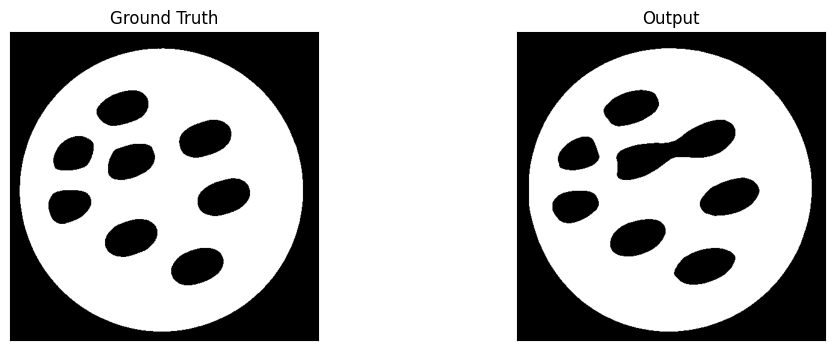

In [22]:
# ta
multiplot(img_list[0])

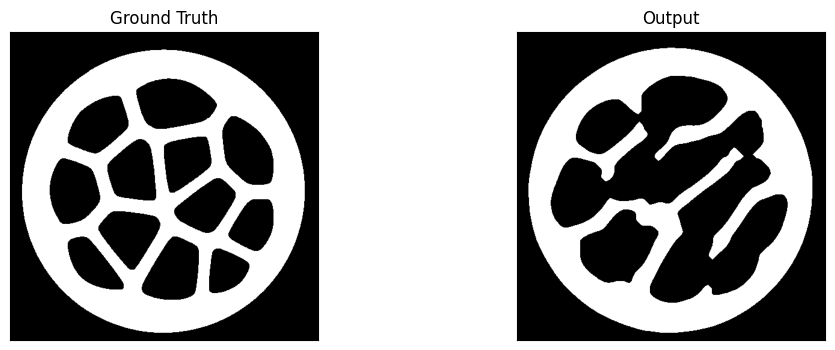

In [23]:
# tb
multiplot(img_list[1])

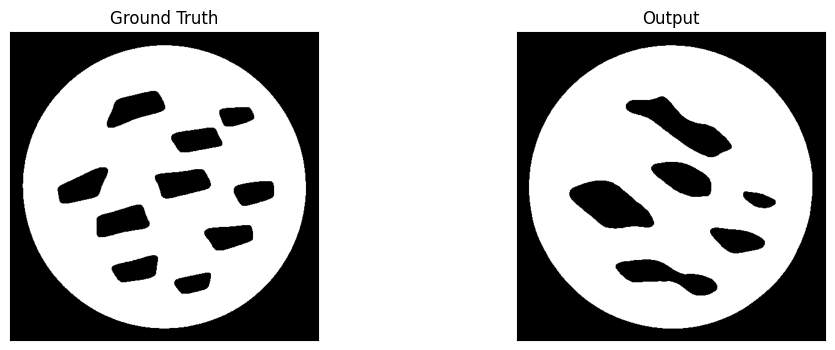

In [24]:
# tc
multiplot(img_list[2])

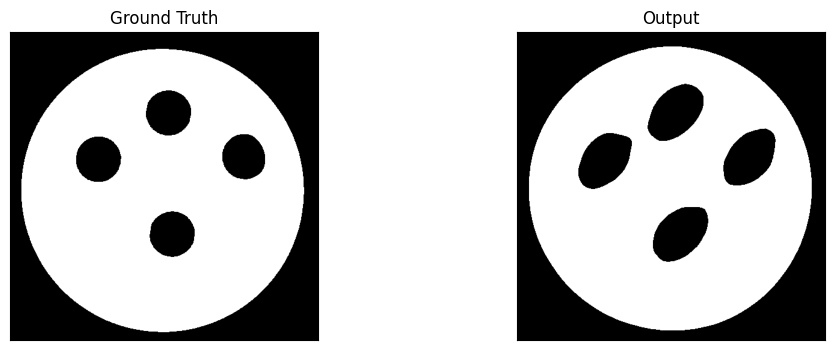

In [14]:
# td
multiplot(img_list[3])